In [97]:
#standard numpy and matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation

#mpl_toolkits is used for 3D plotting 
from mpl_toolkits.mplot3d import axes3d

%matplotlib notebook

In [34]:
X = [0.5 , 2.5]
Y = [0.2 , 0.9]

In [35]:
def sigmoid_function(x , w ,b):
    """
    Input - Scalar X , Single Weight and a bias
    Output - Sigmoid(x)
    """
    return (1.0) / (1.0 + np.exp(-(x*w + b)))
    

In [36]:
def error_function(w ,b):
    err = 0 
    for x , y in zip(X , Y):
        err += (0.5) * (sigmoid_function(x , w , b) - y) ** 2
    return err

In [107]:
def grad_w(x, y , w , b):
    return (sigmoid_function(x , w , b) -y)*(sigmoid_function(x ,w ,b)) * (1- sigmoid_function(x , w ,b )) * x

In [108]:
def grad_b(x, y , w , b):
    return (sigmoid_function(x , w ,b) -y)*(sigmoid_function(x , w , b)) * (1- sigmoid_function(x ,w , b))

In [109]:
def gradient_descend():
    w , b , eata , max_iter = -2 , -2 , 1.0 , 1000
    w_array = []
    b_array = []
    w_array.append(w)
    b_array.append(b)
    for i in range(max_iter):
        dw , db = 0 , 0 
        
        for x , y in zip(X,Y):
            dw += grad_w(x,y,w,b)
            db += grad_b(x,y,w,b)
        w -= eata * dw
        b -= eata * db
        w_array.append(w)
        b_array.append(b)
    return w_array , b_array
        

In [110]:
w_random = b_random = np.arange(-20.0, 20.0, 0.5)
w_random , b_random = np.meshgrid(w_random , b_random)

err = []
for i in range(len(w_random[0])):
    
    y_list = []
    for j in range(len(w_random)):
        y_list.append(error_function(w_random[i][j] , b_random[i][j]))
    err.append(y_list)

err = np.array(err)


In [114]:
w_arr , b_arr = gradient_descend()
err_arr = [error_function(w_arr[i] , b_arr[i]) for i in range(len(w_arr))]
err_arr

[0.4158199010199929,
 0.41572985510220245,
 0.4156381130345323,
 0.4155446258111779,
 0.41544934240038417,
 0.41535220962939745,
 0.41525317206086976,
 0.4151521718599259,
 0.4150491486510202,
 0.4149440393636118,
 0.41483677806557867,
 0.41472729578316725,
 0.4146155203061341,
 0.41450137597657843,
 0.41438478345978624,
 0.4142656594951988,
 0.4141439166253913,
 0.41401946290067587,
 0.41389220155664497,
 0.41376203066161965,
 0.4136288427305683,
 0.41349252430160366,
 0.413352955470632,
 0.41321000937911834,
 0.4130635516492188,
 0.41291343975970635,
 0.4127595223551555,
 0.4126016384797273,
 0.41243961672558554,
 0.41227327428442684,
 0.4121024158887969,
 0.4119268326277159,
 0.4117463006185969,
 0.4115605795144224,
 0.4113694108215424,
 0.4111725159991485,
 0.4109695943063079,
 0.4107603203562007,
 0.4105443413296602,
 0.4103212737909419,
 0.4100907000374557,
 0.4098521639014758,
 0.4096051659049437,
 0.40934915764756585,
 0.40908353528239183,
 0.40880763190051433,
 0.4085207086056

<IPython.core.display.Javascript object>


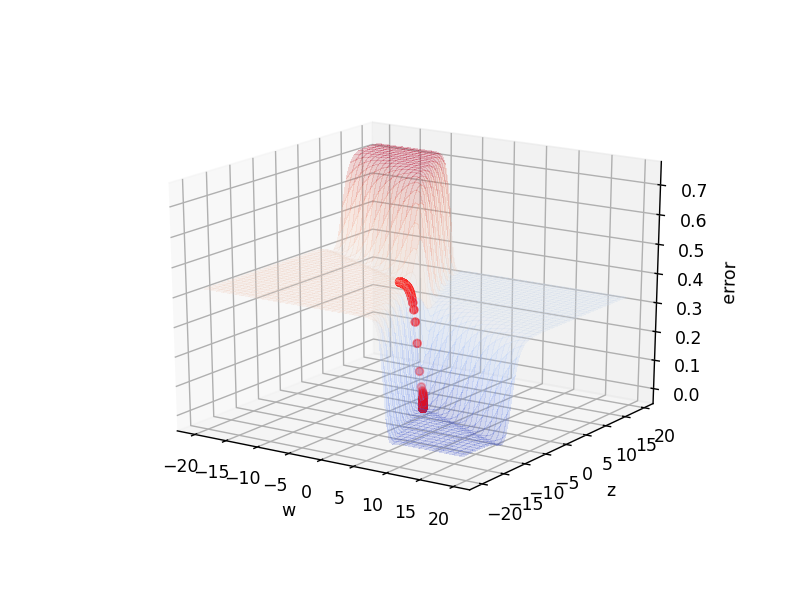

In [120]:

fig = plt.figure()
ax = fig.gca(projection='3d')
sur = ax.plot_surface(w_random,b_random , err , antialiased=False , linewidth=0 , cmap="coolwarm" , alpha= 0.2)
ax.set_xlabel("w")
ax.set_ylabel("z")
ax.set_zlabel("error")

scatter = ax.scatter(w_arr , b_arr , err_arr , c='r')


plt.show()